Walmart sales Analysis Q1

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(r"C:\Users\cheth\Downloads\Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx")

In [9]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
5,699-14-3026,B,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30:00,Ewallet,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,2/25/2019,14:36:00,Ewallet,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,2/24/2019,11:38:00,Ewallet,8.0
8,665-32-9167,B,Yangon,Member,Female,Health and beauty,36.26,2,1/10/2019,17:15:00,Credit card,7.2
9,692-92-5582,A,Mandalay,Member,Female,Food and beverages,54.84,3,2/20/2019,13:27:00,Credit card,5.9


Data understanding

In [11]:
df.shape

(1000, 12)

In [17]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [23]:
 df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


Data preparation

In [29]:
df.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [33]:
df.Date = pd.to_datetime(df.Date)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   object        
 10  Payment        1000 non-null   object        
 11  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 93.9+ KB


Analysis

In [58]:
df['Revenue']=df['Quantity']*df['Unit price']

In [60]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17


Exploratory Data Analysis

In [75]:
df=df.sort_values(by='Revenue',ascending=False).head(10)

In [85]:
plt.figure(figsize=(7,3))


<Figure size 700x300 with 0 Axes>

<Figure size 700x300 with 0 Axes>

<BarContainer object of 10 artists>

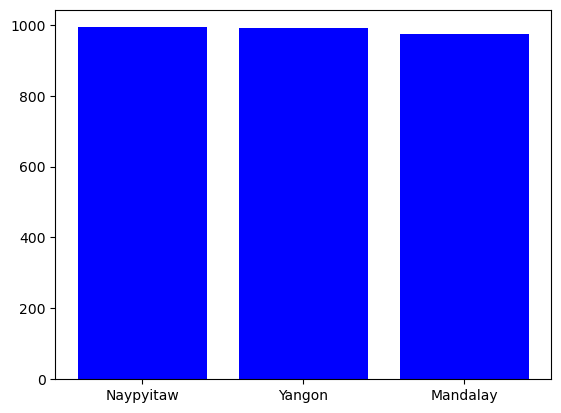

In [87]:
plt.bar(df['City'],df['Revenue'],color='blue')

Naypyitaw have highest revennue than the other two

C:\Users\cheth\AppData\Local\Temp\ipykernel_21744\3668754127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_data,x='Branch',y='Revenue',palette='viridis')


<Axes: xlabel='Branch', ylabel='Revenue'>

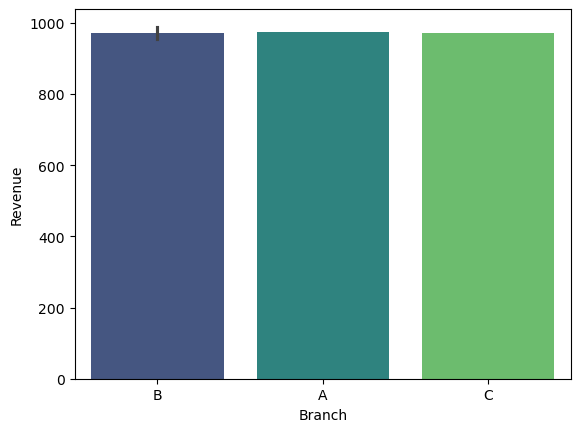

In [164]:
city_info= df[df['City']== 'Naypyitaw']
sns.barplot(data=city_info,x='Branch',y='Revenue',palette='viridis')

Branch B in Naypyitaw gives highest revenue

In [110]:
total_revenue_per_city = df.groupby('City')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=True)

In [112]:
total_revenue_per_city

,City,Revenue
1,Naypyitaw,5835.5
0,Mandalay,1947.5
2,Yangon,1896.3


Total revenue

In [118]:
branch_revenue = df.groupby(['City', 'Branch'])['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)


In [120]:
branch_revenue 


,City,Branch,Revenue
2,Naypyitaw,B,3888.4
0,Mandalay,A,1947.5
5,Yangon,C,989.8
1,Naypyitaw,A,975.0
3,Naypyitaw,C,972.1
4,Yangon,A,906.5


Total revenue branch-wise

In [143]:
revenue_over_time = df.groupby(['City', 'Date'])['Revenue'].sum().reset_index()

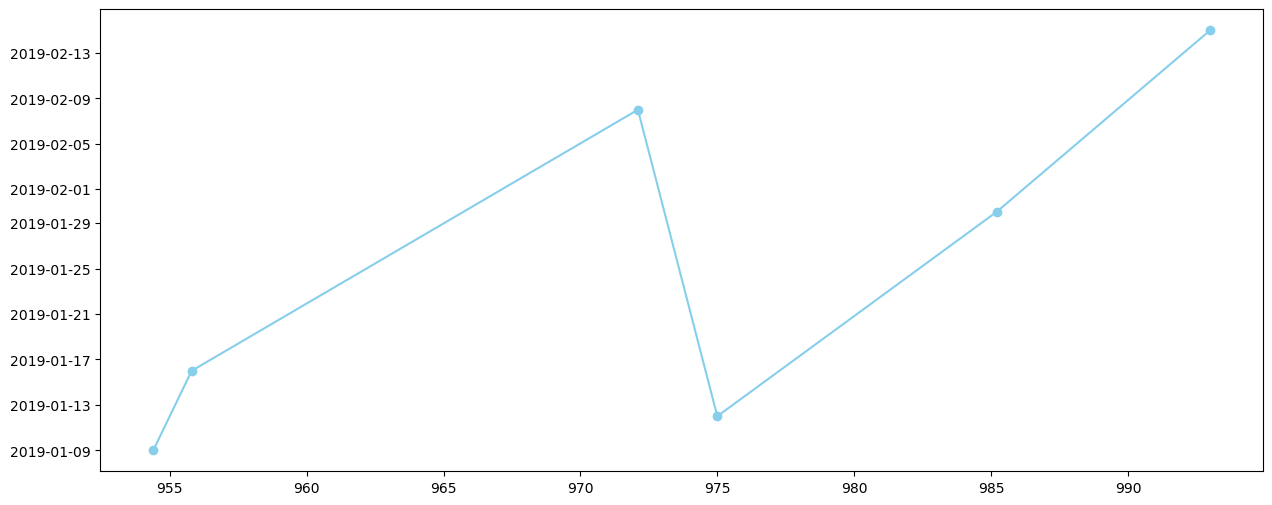

In [139]:
city_name = 'Naypyitaw'
city_data = df[df['City'] == city_name]

# Plot the revenue trend over time for the specific city
plt.figure(figsize=(15, 6))
plt.plot(city_data['Revenue'],city_data['Date'], marker='o', color='skyblue', label=city_name)


Naypyitaw have a notable fluctuation in revenue over time

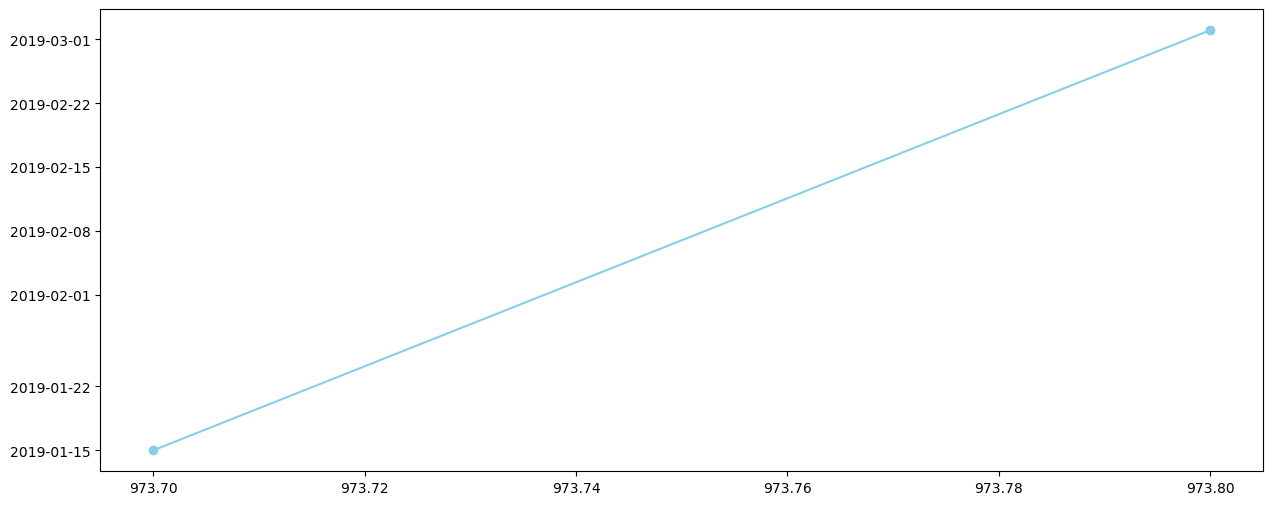

In [145]:
city_name = 'Mandalay'
city_data = df[df['City'] == city_name]

# Plot the revenue trend over time for the specific city
plt.figure(figsize=(15, 6))
plt.plot(city_data['Revenue'],city_data['Date'], marker='o', color='skyblue', label=city_name)


Mandalay have consistency in revenue over a period of time

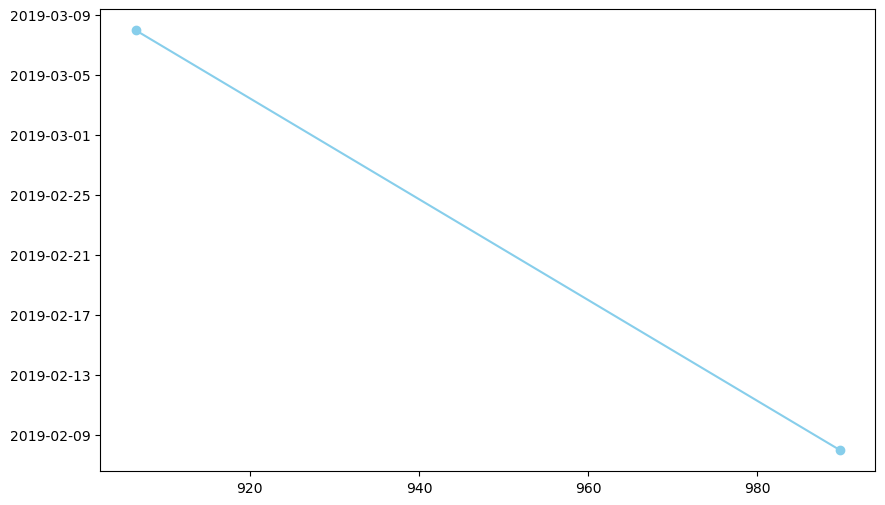

In [153]:
city_name = 'Yangon'
city_data = df[df['City'] == city_name]

# Plot the revenue trend over time for the specific city
plt.figure(figsize=(10, 6))
plt.plot(city_data['Revenue'],city_data['Date'], marker='o', color='skyblue', label=city_name)


Yangon shows a notable denial in revenue over the time

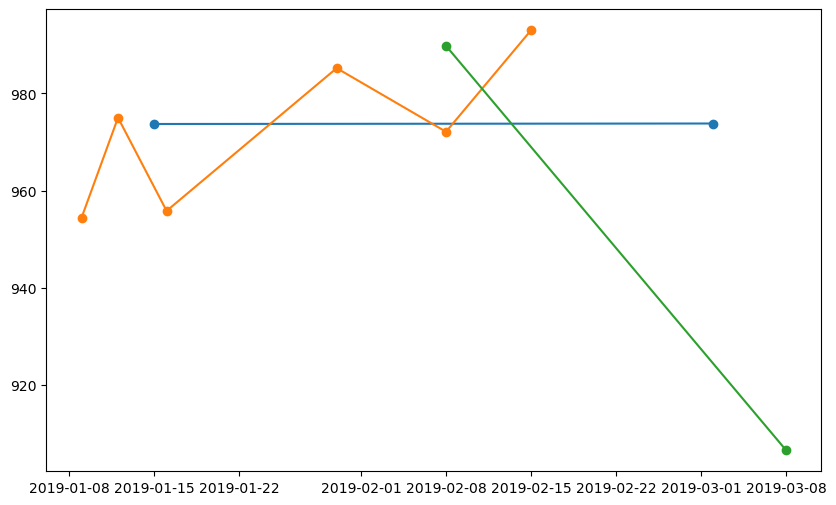

In [151]:
revenue_over_time = df.groupby(['City', 'Date'])['Revenue'].sum().reset_index()

# Plot revenue over time for each city
plt.figure(figsize=(10, 6))

# Loop through each city and plot its revenue trend over time
for city in revenue_over_time['City'].unique():
    city_data = revenue_over_time[revenue_over_time['City'] == city]
    plt.plot(city_data['Date'], city_data['Revenue'], marker='o', label=city)

City wise revenue over a time priod